In [28]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
path = kagglehub.dataset_download('arashnic/ctr-in-advertisement')
print("Dataset path:", path)

/home/thangquang/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 7.14M/7.14M [00:12<00:00, 585kB/s] 

Extracting files...


Dataset path: /home/thangquang/.cache/kagglehub/datasets/arashnic/ctr-in-advertisement/versions/1


In [ ]:
os.listdir(path)

['Ad_Click_prediciton_test.csv', 'Ad_click_prediction_train (1).csv']

In [ ]:
pdf0x_train = pd.read_csv(os.path.join(path, 'Ad_click_prediction_train (1).csv'))
pdf0x_test = pd.read_csv(os.path.join(path, 'Ad_Click_prediciton_test.csv'))

In [8]:
pdf0x_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [ ]:
pdf0x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [17]:
pdf0x_train['product_category_1'].unique()

array([4, 5, 3, 2, 1])

In [18]:
pdf0x_train['product_category_2'].unique()

array([    nan, 270915., 146115., 254132., 372532., 450184.,  18595.,
       255689., 408790., 202351., 408831.,  32026., 235358., 143597.,
       234846., 301147.,  99226., 419804., 269093., 270147., 181650.,
        66101., 419304., 300711., 447834.,  82527., 327439., 381435.,
       168114., 247789.])

In [23]:
pdf0x_train['user_depth'].unique()

array([ 3.,  2., nan,  1.])

In [21]:
pdf0x_train['user_depth'].describe()

count    445048.000000
mean          2.878415
std           0.400130
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: user_depth, dtype: float64

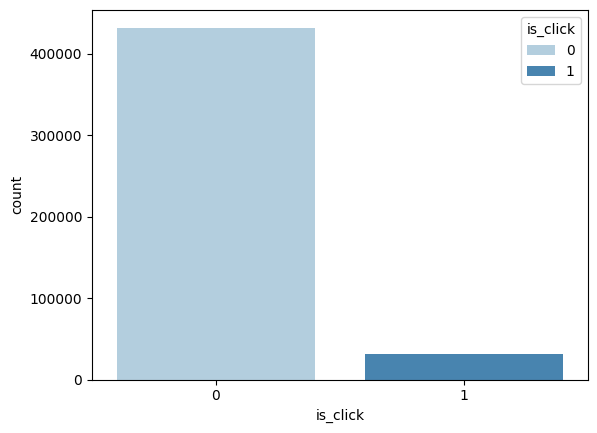

In [33]:
sns.countplot(x='is_click', data=pdf0x_train, hue='is_click', palette='Blues')
plt.show()

In [38]:
print(pdf0x_train.DateTime.max())
print(pdf0x_test.DateTime.max())

2017-07-07 23:59
2017-07-09 21:29


In [39]:
print(pdf0x_train.DateTime.min())
print(pdf0x_test.DateTime.min())

2017-07-02 00:00
2017-07-08 00:00


In [37]:
pdf0x_train.shape

(463291, 15)

In [45]:
pdf0x_train['DateTime'] = pd.to_datetime(pdf0x_train['DateTime'])
pdf0x_test['DateTime'] = pd.to_datetime(pdf0x_test['DateTime'])

In [ ]:
def train_test_split_out_of_time(dataset):
    

In [46]:
pdf0x_train.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [ ]:
drop_cols = ['session_id', 'user_id', 'campaign_id', 'webpage_id', 'DateTime', 'is_click']
target_col = ['is_click']